# About Dataset -

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.


- This is 50k movie review data of IMDB site.
- There are two column - Review / Sentiment
- In review column there is user review given for particular movie.
- Sentiment column will explain what was the review - Positive/Negative
- Creating NLP Model to predict future movie data it is Positive or Negative review.

### STEPS -
        below are the steps of entire process to do any project using NLP. In this notebook I will perform task 
        till vectorization


## - Data Gathering:-
       - Data picked from kaggle

 
## - Data Cleaning :-
    
    - Lowercasing
    - Removing leading and trailing spaces
    - Removing urls(no help in sentiment analysis so will remove)
    - Expanding abbreviations (short form of words ex-  'doesn't convert into does not')
    - Spelling correction(for avoid duplication)
    - Punctuations removal (period, comma, apostrophe, quotation, question, exclamation, brackets, braces, 
                 parenthesis, dash, hyphen, ellipsis, colon, semicolon)
    - Remove special characters
                             (https://owasp.org/www-community/password-special-characters)

## - Data Preprocessing:-
  
      - Tokenization
      - Stopwords Removal (Ex- AM, I , HAVE, COULD, IS, THE, ARE)
      - Stemming (create words in root form Ex- dance/danced/dancing - Dance)
      
## - Make Some features:-
          
          creating new column which may help to predict reviews or negative or positive.
          

## - EDA and Feature Engineering:-
   
         - distribution of text length/word count
         - common unigrams/bigrams/trigrams
         - wordcloud

          
## - Vectorization:-

          converting all 50000 reviews into numbers
          Technique - TFIDF/ Bag of words/ Word2VEc
       
## - Modeling:-
        
           Now data is ready in form of numbers and do modeling with different ml/deep learning techniques to check
           which techniques perform the best on data.
           
## - Evaluation:-

           Choosing the best performing model
           
## - Deploy:-

          convert into website or app and put on server.
          
## - Monitor:-

           upgrade,debug,etc

           
          


### 1- Uploading the required dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 2- checking how many rows and column in dataset

In [4]:
df.shape
# there are 50000 rows(movie reviews) and 2 column

(50000, 2)

## 3- Fetching first row movie review 

In [5]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df['review'][21]

'I had the terrible misfortune of having to view this "b-movie" in it\'s entirety.<br /><br />All I have to say is--- save your time and money!!! This has got to be the worst b-movie of all time, it shouldn\'t even be called a b-movie, more like an f-movie! Because it fails in all aspects that make a good movie: the story is not interesting at all, all of the actors are paper-thin and not at all believable, it has bad direction and the action sequences are so fake it\'s almost funny.......almost.<br /><br />The movie is just packed full of crappy one-liners that no respectable person could find amusing in the least little bit.<br /><br />This movie is supposed to be geared towards men, but all the women in it are SO utterly unattractive, especially that old wrinkled thing that comes in towards the end. They try to appear sexy in those weird, horrible costumes and they fail miserably!!!<br /><br />Even some of the most ridiculous b-movies will still give you some laughs, but this is jus

## 4- Checking Duplicate data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.duplicated().sum()
# There are 418 duplicate values

418

In [9]:
# removing duplicate values and storing in df.
df = df.drop_duplicates()

In [10]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [11]:
df.duplicated().sum()
# now can see all duplicated values removed

0

In [12]:
df = df.iloc[:10000]

## 5- CLEANING

#### Lower Case

In [13]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [14]:
df['review']= df['review'].str.lower()
# this is not permanent operation it just a series so i will reassign this to df again for permanent changes.

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/801743290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']= df['review'].str.lower()


In [15]:
df.head(2)
# can see now all reviews are visible in lower form of alphabet

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive


### Remove Whitespaces

In [16]:
  df['review']= df['review'].str.strip()

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/2675821712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']= df['review'].str.strip()


In [17]:
df.head(2)
# all white spaces remove if any in data.

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive


### Removing Html Tags

In [18]:
import re

In [19]:
df['review'].str.replace(r'<.*?>','')

# replacing the above tags with space and restore in our df.

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/2471900070.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'].str.replace(r'<.*?>','')


0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

In [20]:
df['review'] = df['review'].str.replace(r'<.*?>','')

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/3579200346.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace(r'<.*?>','')
/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/3579200346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.replace(r'<.*?>','')


### Removing URLS

#### Finding in which reviews one or more than one urls are present?

In [21]:
df['review'].str.contains(r"https?://\S+|www\.\S+")
# this will give boolean series

0        False
1        False
2        False
3        False
4        False
         ...  
10012    False
10013    False
10014    False
10015    False
10016    False
Name: review, Length: 10000, dtype: bool

In [22]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+")]

# putting this url removing code in df will give only those rowa where either one or more than one time url occur.

,review,sentiment
742,mario lewis of the competitive enterprise inst...,negative
907,following directly from where the story left o...,positive
1088,this quasi j-horror film followed a young woma...,negative
1137,i really think i should make my case and have ...,positive
1141,this show has to be my favorite out of all the...,positive
1972,the basic plot of 'marigold' boasts of a roman...,negative
2132,"i, too, found ""oppenheimer"" to be a brilliant ...",positive
3020,"the angry red planet (quickie review) like ""th...",negative
3038,"i really love this movie , i saw it for the fi...",positive
3200,i think that mario van peebles movie posse is ...,positive


In [23]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[0].values
# can see on first row url present

array(['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.',
       'negative'], dtype=object)

In [24]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[2].values
# checking with 2 number rows to see url 

array(["this quasi j-horror film followed a young woman as she returns to her childhood village on the island of shikoku to sell the family house and meet up with old friends. she finds that one, the daughter of the village priestess, drowned several years earlier. she and fumiko (another childhood friend) then learn that sayori's mother is trying to bring her back to life with black magic. already the bonds between the dead and living are getting weak and the friends and villagers are seeing ghosts. nothing was exceptional or even very good about this movie. unlike stellar j-horror films, the suspense doesn't really build, the result doesn't seem overly threatening and the ending borders on the absurd.this movie is like plain white rice cooked a little too long so that it is bordering on mushy. sometimes you get this at poor asian restaurants or cook your own white rice a little too long. you end up eating it, because you need it with the meal, because what is chinese or japanese food

#### code to remove a URL

In [25]:
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'')

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/4127648452.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'')
/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/4127648452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'')


In [26]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Expanding Abbreviations

In [27]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [28]:
df['review'].apply(remove_abb)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

In [29]:
df['review']= df['review'].apply(remove_abb) # restore in df this code

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/2921417995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']= df['review'].apply(remove_abb) # restore in df this code


In [30]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

#### Spelling Correction

In [31]:
# using "textblob" library to perfrom this work.

In [32]:
from textblob import TextBlob

In [33]:
text = "hi I can drve at nigt"
TextBlob(text).correct().string

'hi I can drove at night'

In [34]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [35]:
# df['review'].apply(spelling_correction)

#### Removing Punctuation

In [37]:
import string

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def remove_punctuation(text):
    
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text       

In [40]:
remove_punctuation('Hi! How are you?')

'Hi How are you'

In [41]:
df['review']= df['review'].apply(remove_punctuation)
df['review'].head()

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/3289958524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']= df['review'].apply(remove_punctuation)


0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

#### Removing Special Character

In [43]:
df['review'] = df['review'].str.replace('[^\w\s]','')

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/979456620.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]','')
/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/979456620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.replace('[^\w\s]','')


# 6- Data Preprocessing

### Tokenization

In [48]:
import nltk

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nimishasingh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
from nltk.tokenize import word_tokenize

In [51]:
df['tokenized_review'] = df['review'].apply(word_tokenize)

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/978643584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_review'] = df['review'].apply(word_tokenize)


In [52]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


### Stop Word Removal

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nimishasingh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
from nltk.corpus import stopwords

In [57]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
len(stopwords.words('english'))

179

In [59]:
# removing this 179 stop words from all reviews

In [64]:
def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L        

In [65]:
# now apply this remove_stopwords function to remove stopwords and restore in df.
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/1660969949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)


In [66]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [67]:
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/1304386799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))


In [68]:
df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


### Now creating new variable where we can see charachter length

In [69]:
df['char_length'] = df['review'].str.len()

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/3571495401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_length'] = df['review'].str.len()


In [70]:
df.head()

,review,sentiment,tokenized_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


#### Another variable creating "word_length" which tell number of word in every review.

In [71]:
df['word_length'] = df['tokenized_review'].apply(len)

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/1986620063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_length'] = df['tokenized_review'].apply(len)


In [72]:
df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


### Visualization to see my new variables are giving any further input for data.

In [73]:
import seaborn as sns

- creating "Probability density function"(PDF) to check character length.

/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/4093798214.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

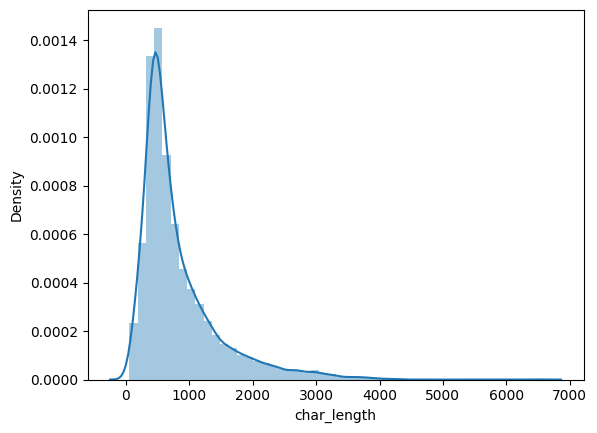

In [75]:
sns.distplot(df['char_length'])

- Understanding - in reviews mostly length is 0-1500 as per percentege wise, less reviews are above 4000 length.

- Now checking review with "positive" and "negative" sentiment.

In [77]:
df[df['sentiment'] == 'positive']

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
5,probably alltime favorite movie story selfless...,positive,"[probably, alltime, favorite, movie, story, se...",394,57
...,...,...,...,...,...
10009,former cambridge contemporary simon heffer tod...,positive,"[former, cambridge, contemporary, simon, heffe...",3709,481
10010,mans navy comments indicated rare wellfilmed l...,positive,"[mans, navy, comments, indicated, rare, wellfi...",709,108
10012,pleasantly surprised find lose friends alienat...,positive,"[pleasantly, surprised, find, lose, friends, a...",668,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",413,59


In [78]:
df[df['sentiment'] == 'negative']

,review,sentiment,tokenized_review,char_length,word_length
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
7,show amazing fresh innovative idea 70s first a...,negative,"[show, amazing, fresh, innovative, idea, 70s, ...",550,82
8,encouraged positive comments film looking forw...,negative,"[encouraged, positive, comments, film, looking...",414,64
10,phil alien one quirky films humour based aroun...,negative,"[phil, alien, one, quirky, films, humour, base...",369,50
11,saw movie 12 came recall scariest scene big bi...,negative,"[saw, movie, 12, came, recall, scariest, scene...",553,83
...,...,...,...,...,...
10007,could morbidly fascinating look life one ameri...,negative,"[could, morbidly, fascinating, look, life, one...",257,38
10008,say worse mean less entertaining todd sheets s...,negative,"[say, worse, mean, less, entertaining, todd, s...",657,101
10011,spoilersthis tenchithis tenchipractically ever...,negative,"[spoilersthis, tenchithis, tenchipractically, ...",541,70
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala...",1082,151


/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/1473631054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']== 'negative']['char_length'])
/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/1473631054.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

<Axes: xlabel='char_length', ylabel='Density'>

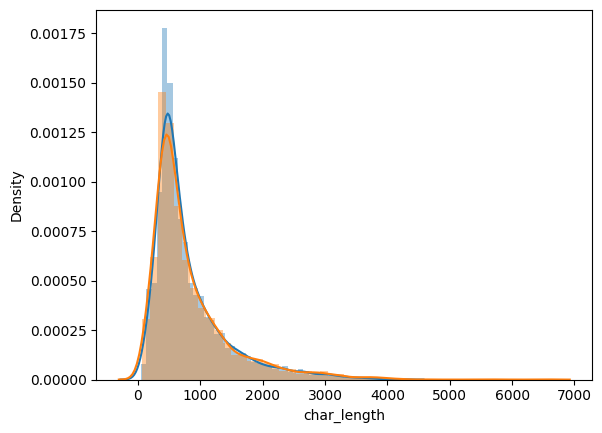

In [79]:
sns.distplot(df[df['sentiment']== 'negative']['char_length'])
sns.distplot(df[df['sentiment']== 'positive']['char_length'])

- if there is difference between both plots then its feature which I created is helpful. 
- if there is no difference then this new variavble not helping to get more insight of data.
- as in above graph "orange curve" is "negative curve" which is slight higher side it means negative data length
is high compare to positive data.


/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/3480675452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
/var/folders/2t/mgksmkvx0r122pmd1rqbt8yc0000gn/T/ipykernel_12712/3480675452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

<Axes: xlabel='word_length', ylabel='Density'>

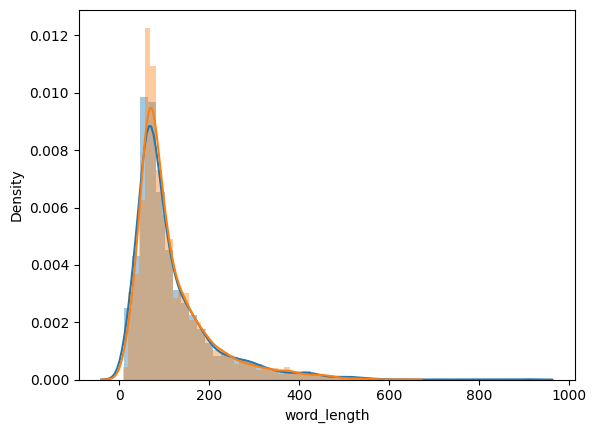

In [80]:
sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
sns.distplot(df[df['sentiment'] == 'negative']['word_length'])

In [81]:
df['tokenized_review'].sum()

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go

# 7- EDA and Feature Engineering

##### Creating Bigram

In [82]:
from nltk import ngrams

pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

(I, would)              492
(ever, seen)            459
(special, effects)      438
(I, seen)               429
(even, though)          372
                       ... 
(vicki, finally)          1
(finally, possessed)      1
(possessed, film)         1
(finally, picks)          1
(hurt, yet)               1
Length: 844418, dtype: int64

#### Top Trigram

In [83]:
pd.Series(ngrams(df['tokenized_review'].sum(),3)).value_counts()
# creating trigram and then applying series and do value counts so it will show firstly common trigram.

(I, ever, seen)               169
(worst, movie, ever)           69
(movie, ever, seen)            56
(I, would, like)               56
(one, worst, movies)           55
                             ... 
(looked, always, imagined)      1
(always, imagined, anne)        1
(imagined, anne, elliot)        1
(anne, elliot, would)           1
(head, hurt, yet)               1
Length: 1148969, dtype: int64

## Word CLoud

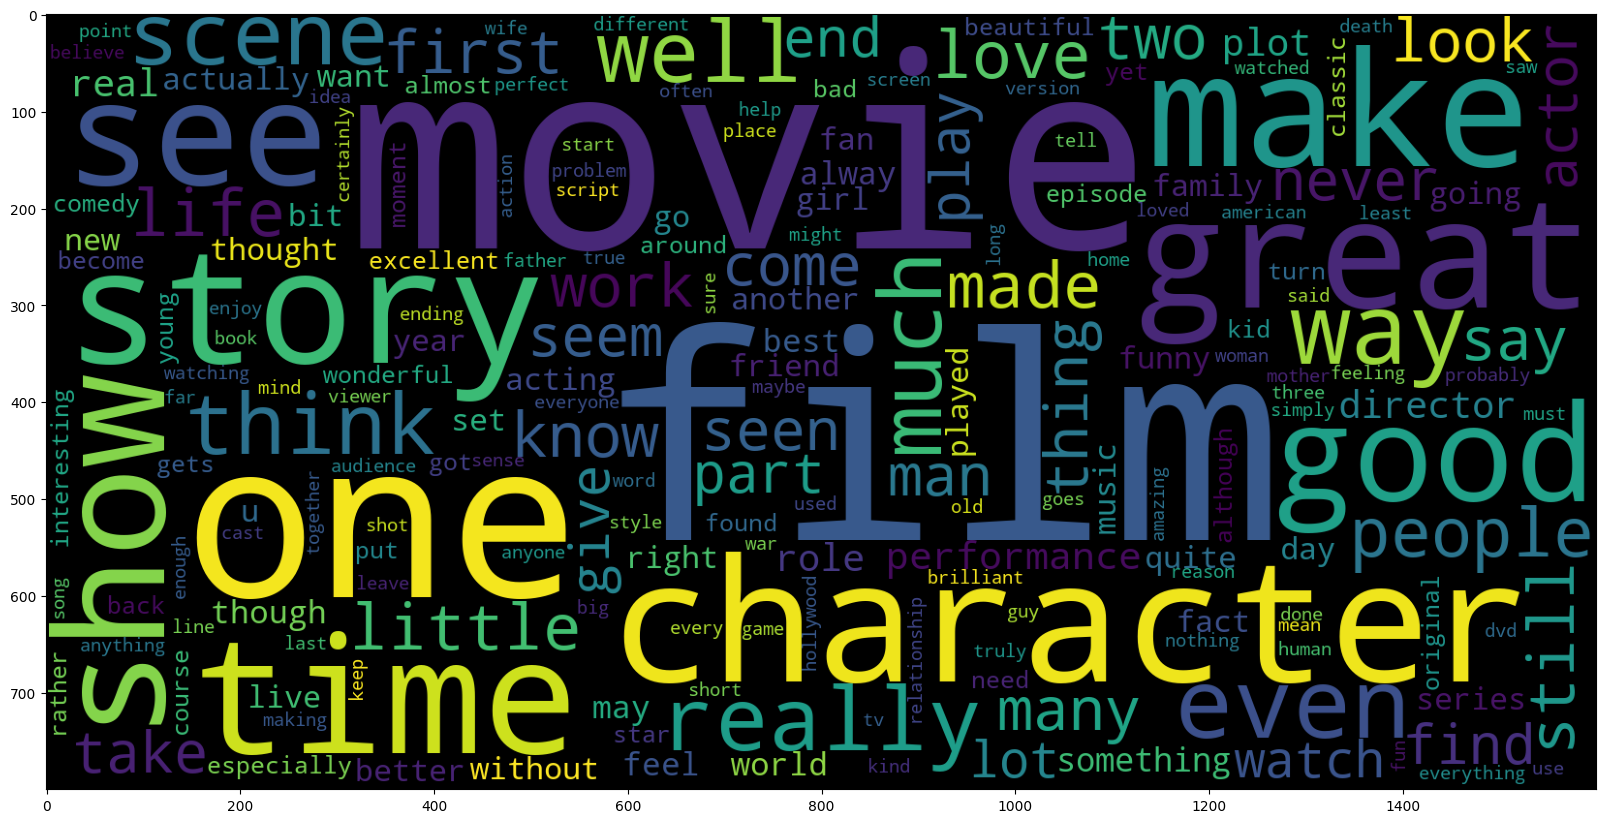

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)


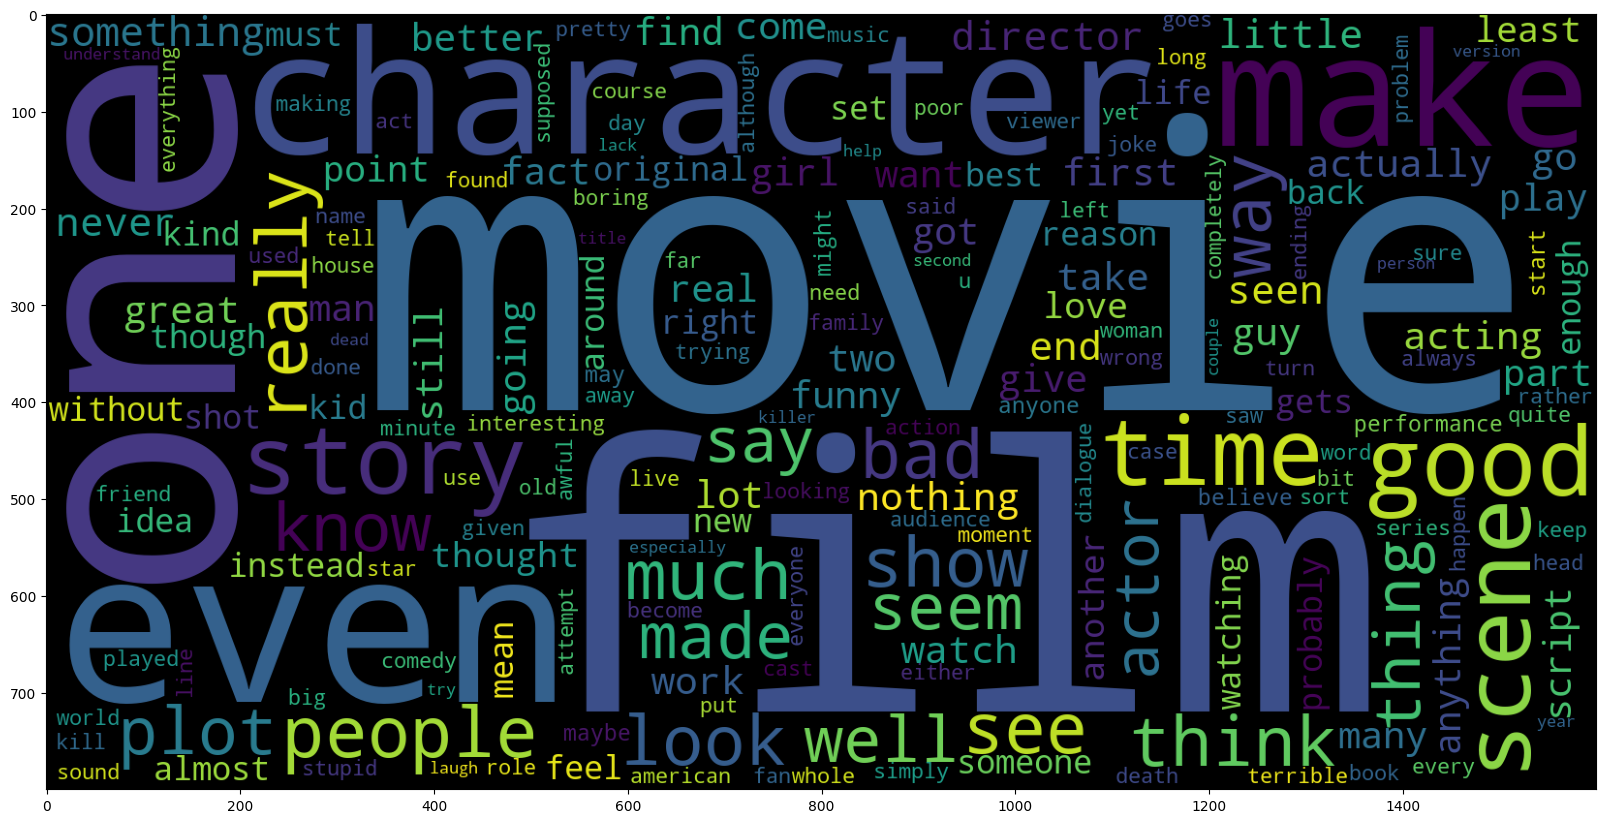

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

# 8- Vectorization

##  BoW (Bag of Words)

- t is a simple and effective way of representing text data as numerical features for machine learning models.

- Steps:-
    firstly take all unique words
    then row wise check the words frequency and count number of occurence 
    the word present count in number as per occurence rest word put zero.
    so this way we will get vector for all words and this vector will send to machine learning.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])

In [96]:
print(dir(count_vectorizer))


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_char_ngrams', '_char_wb_ngrams', '_check_feature_names', '_check_n_features', '_check_stop_words_consistency', '_check_vocabulary', '_count_vocab', '_get_param_names', '_get_tags', '_limit_features', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sort_features', '_stop_words_id', '_validate_data', '_validate_ngram_range', '_validate_params', '_validate_vocabulary', '_warn_for_unused_params', '_white_spaces', '_word_ngrams', 'analyzer', 'binary', 'build_analyzer', 'build_preprocessor', 'build_tokenizer', 'decode', 'decode_error', 'dtype', 'encodi

In [97]:
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

- In count vectorization choosing most 5000 occuring words from 50000 rows.
- creating new data with 50000 rows and 5000 column which will show sparse array(where 0 value present)
-creating a CountVectorizer object with max_features=5000 and ngram_range=(1,3). 
This means that the vectorizer will extract up to 5000 features (tokens) 
and include unigrams, bigrams, and trigrams in the extracted features.
-using the fit_transform method of the vectorizer to convert a DataFrame column 
containing text data (df['review']) into a matrix of token counts. 
- The toarray() method is called on this matrix to convert it into a NumPy array, and then this array is 
passed as the first argument to the pd.DataFrame constructor to create a pandas DataFrame
- The columns parameter of the pd.DataFrame constructor is set to count_vectorizer.get_feature_names(), 
which returns a list of feature names in the order they appear in the matrix of token counts.
- One thing to note is that the resulting matrix will have one row per text in the input data 
and one column per feature (token) extracted by the vectorizer.

In [98]:
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young girl,young man,young people,young woman,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 9- PCA

- CREATING HIGHER DIMENSION DATA INTO LOWER DIMENSION.

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 dimension 
pca_result = pca.fit_transform(bag_of_words.values)

In [100]:
pca_result

array([[-1.29546334, -0.48730446],
       [-2.20712504, -0.56934916],
       [-1.83994509, -0.45120263],
       ...,
       [ 1.02345889, -2.75056273],
       [-0.88699652,  0.24715779],
       [ 4.58767753,  2.67731507]])

In [101]:
pca_result.shape

(10000, 2)

<Axes: >

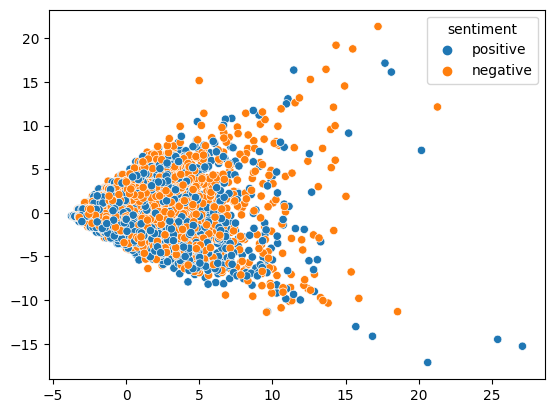

In [103]:
sns.scatterplot(data=df, x=pca_result[:,0], y=pca_result[:,1], hue='sentiment')


### By examining the scatter plot, make a few observations:

- The points are widely spread out across the plot, indicating that there is significant variability in the data.

- There are clusters of points in different regions of the plot, suggesting that there may be patterns or structures in the data.

- The colors of the points are not clearly separated, meaning that it may be difficult to distinguish between positive, negative, and neutral reviews based solely on their principal components

Overall, the scatter plot provides a high-level overview of the relationship between the principal components and the sentiment of the reviews. However, it may be useful to further analyze the clusters or patterns in the data to gain deeper insights into the factors that drive sentiment in the reviews.